<a href="https://colab.research.google.com/github/rajiv-ranjan/cds-mini-projects/blob/saif/M2_MP4_NB_Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini Project Notebook: Employee Attrition Prediction

## **Note:** This notebook is part of an in-house Kaggle competition

## Problem Statement

To predict employee attrition using CatBoost and XgBoost

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

### **Kaggle Competition**

Please refer to the link for viewing the
[Kaggle Competition Document](https://drive.google.com/file/d/1c7PrbKrURFcnEB61dSoS9cBnUUVhhj-l/view?usp=drive_link) and join the Kaggle Competition using the hyperlink given in this document under '*Kaggle* Competition site'.

## Grading = 10 Points

In [2]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/hr_employee_attrition_train.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


### Install CatBoost

In [3]:
!pip -qq install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


### Import Required Packages

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [5]:
# read the dataset
# YOUR CODE HERE
df = pd.read_csv('hr_employee_attrition_train.csv')

In [6]:
df.head()

age businesstravel  dailyrate              department  distancefromhome  \
0   45  Travel_Rarely        556  Research & Development                25   
1   34  Travel_Rarely        970  Research & Development                 8   
2   39  Travel_Rarely        360  Research & Development                23   
3   26  Travel_Rarely        933                   Sales                 1   
4   40  Travel_Rarely        329  Research & Development                 1   

   education educationfield  employeecount  employeenumber  \
0          2  Life Sciences              1            1888   
1          2        Medical              1             757   
2          3        Medical              1            1310   
3          3  Life Sciences              1             476   
4          4  Life Sciences              1            1361   

   environmentsatisfaction  gender  hourlyrate  jobinvolvement  joblevel  \
0                        2  Female          93               2         2   
1                        2  Female          96               3         2   
2                        3    Male          93               3         1   
3                        3    Male          57               3         2   
4                        2    Male          88               3         1   

                     jobrole  jobsatisfaction maritalstatus  monthlyincome  \
0     Manufacturing Director                4       Married           5906   
1  Healthcare Representative                3        Single           6142   
2         Research Scientist                1        Single           3904   
3            Sales Executive                3       Married           5296   
4      Laboratory Technician                2       Married           2387   

   monthlyrate  numcompaniesworked over18 overtime  percentsalaryhike  \
0        23888                   0      Y       No                 13   
1         7360                   3      Y       No                 11   
2        22154                   0      Y       No                 13   
3        20156                   1      Y       No                 17   
4         6762                   3      Y       No                 22   

   performancerating  relationshipsatisfaction  standardhours  \
0                  3                         4             80   
1                  3                         4             80   
2                  3                         1             80   
3                  3                         2             80   
4                  4                         3             80   

   stockoptionlevel  totalworkingyears  trainingtimeslastyear  \
0                 2                 10                      2   
1                 0                 10                      2   
2                 0                  6                      2   
3                 1                  8                      3   
4                 1                  7                      3   

   worklifebalance  yearsatcompany  yearsincurrentrole  \
0                2               9                   8   
1                3               5                   1   
2                3               5                   2   
3                3               8                   7   
4                3               4                   2   

   yearssincelastpromotion  yearswithcurrmanager attrition  
0                        3                     8        No  
1                        4                     3        No  
2                        0                     3       Yes  
3                        7                     7        No  
4                        0                     3        No

In [7]:
# Check the shape of dataframe.
# YOUR CODE HERE
df.shape

(1170, 35)

There can be more than one file to read as this is introduced as a competition, dataset has one file for training the model. Their can be other files as one containing the test features and the other can be the true labels.

## Data Exploration

- Check for missing values
- Check for consistent data type across a feature
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:** Use `for` to iterate through each column.

In [8]:
missing_values = df.isnull().sum() #Checking Missing Values
print(missing_values)

age                         0
businesstravel              0
dailyrate                   0
department                  0
distancefromhome            0
education                   0
educationfield              0
employeecount               0
employeenumber              0
environmentsatisfaction     0
gender                      0
hourlyrate                  0
jobinvolvement              0
joblevel                    0
jobrole                     0
jobsatisfaction             0
maritalstatus               0
monthlyincome               0
monthlyrate                 0
numcompaniesworked          0
over18                      0
overtime                    0
percentsalaryhike           0
performancerating           0
relationshipsatisfaction    0
standardhours               0
stockoptionlevel            0
totalworkingyears           0
trainingtimeslastyear       0
worklifebalance             0
yearsatcompany              0
yearsincurrentrole          0
yearssincelastpromotion     0
yearswithc

In [9]:
print(df.dtypes)

age                          int64
businesstravel              object
dailyrate                    int64
department                  object
distancefromhome             int64
education                    int64
educationfield              object
employeecount                int64
employeenumber               int64
environmentsatisfaction      int64
gender                      object
hourlyrate                   int64
jobinvolvement               int64
joblevel                     int64
jobrole                     object
jobsatisfaction              int64
maritalstatus               object
monthlyincome                int64
monthlyrate                  int64
numcompaniesworked           int64
over18                      object
overtime                    object
percentsalaryhike            int64
performancerating            int64
relationshipsatisfaction     int64
standardhours                int64
stockoptionlevel             int64
totalworkingyears            int64
trainingtimeslastyea

In [10]:
df.describe()

age    dailyrate  distancefromhome    education  employeecount  \
count  1170.000000  1170.000000       1170.000000  1170.000000         1170.0   
mean     36.858120   797.822222          9.262393     2.917949            1.0   
std       9.183448   403.592661          8.150868     1.011534            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   461.000000          2.000000     2.000000            1.0   
50%      35.000000   798.000000          7.000000     3.000000            1.0   
75%      43.000000  1146.750000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       employeenumber  environmentsatisfaction   hourlyrate  jobinvolvement  \
count     1170.000000              1170.000000  1170.000000     1170.000000   
mean      1021.113675                 2.723932    65.501709        2.747009   
std        600.548289                 1.095847    20.310054        0.702625   
min          1.000000                 1.000000    30.000000        1.000000   
25%        496.250000                 2.000000    48.000000        2.000000   
50%       1008.500000                 3.000000    66.000000        3.000000   
75%       1548.500000                 4.000000    83.000000        3.000000   
max       2065.000000                 4.000000   100.000000        4.000000   

          joblevel  jobsatisfaction  monthlyincome   monthlyrate  \
count  1170.000000      1170.000000    1170.000000   1170.000000   
mean      2.049573         2.723077    6456.937607  14411.584615   
std       1.096352         1.103799    4660.476506   7078.167743   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2914.750000   8387.500000   
50%       2.000000         3.000000    4903.500000  14536.000000   
75%       3.000000         4.000000    8215.250000  20456.250000   
max       5.000000         4.000000   19999.000000  26999.000000   

       numcompaniesworked  percentsalaryhike  performancerating  \
count         1170.000000        1170.000000        1170.000000   
mean             2.750427          15.204274           3.153846   
std              2.521952           3.688952           0.360955   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       relationshipsatisfaction  standardhours  stockoptionlevel  \
count               1170.000000         1170.0       1170.000000   
mean                   2.739316           80.0          0.785470   
std                    1.075225            0.0          0.847253   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       totalworkingyears  trainingtimeslastyear  worklifebalance  \
count        1170.000000            1170.000000      1170.000000   
mean           11.315385               2.842735         2.745299   
std             7.879363               1.306385         0.718864   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       yearsatcompany  yearsincurrentrole  yearssincelastpromotion  \
count     1170.000000          1170.00000              1170.

In [11]:
df.head()

age businesstravel  dailyrate              department  distancefromhome  \
0   45  Travel_Rarely        556  Research & Development                25   
1   34  Travel_Rarely        970  Research & Development                 8   
2   39  Travel_Rarely        360  Research & Development                23   
3   26  Travel_Rarely        933                   Sales                 1   
4   40  Travel_Rarely        329  Research & Development                 1   

   education educationfield  employeecount  employeenumber  \
0          2  Life Sciences              1            1888   
1          2        Medical              1             757   
2          3        Medical              1            1310   
3          3  Life Sciences              1             476   
4          4  Life Sciences              1            1361   

   environmentsatisfaction  gender  hourlyrate  jobinvolvement  joblevel  \
0                        2  Female          93               2         2   
1                        2  Female          96               3         2   
2                        3    Male          93               3         1   
3                        3    Male          57               3         2   
4                        2    Male          88               3         1   

                     jobrole  jobsatisfaction maritalstatus  monthlyincome  \
0     Manufacturing Director                4       Married           5906   
1  Healthcare Representative                3        Single           6142   
2         Research Scientist                1        Single           3904   
3            Sales Executive                3       Married           5296   
4      Laboratory Technician                2       Married           2387   

   monthlyrate  numcompaniesworked over18 overtime  percentsalaryhike  \
0        23888                   0      Y       No                 13   
1         7360                   3      Y       No                 11   
2        22154                   0      Y       No                 13   
3        20156                   1      Y       No                 17   
4         6762                   3      Y       No                 22   

   performancerating  relationshipsatisfaction  standardhours  \
0                  3                         4             80   
1                  3                         4             80   
2                  3                         1             80   
3                  3                         2             80   
4                  4                         3             80   

   stockoptionlevel  totalworkingyears  trainingtimeslastyear  \
0                 2                 10                      2   
1                 0                 10                      2   
2                 0                  6                      2   
3                 1                  8                      3   
4                 1                  7                      3   

   worklifebalance  yearsatcompany  yearsincurrentrole  \
0                2               9                   8   
1                3               5                   1   
2                3               5                   2   
3                3               8                   7   
4                3               4                   2   

   yearssincelastpromotion  yearswithcurrmanager attrition  
0                        3                     8        No  
1                        4                     3        No  
2                        0                     3       Yes  
3                        7                     7        No  
4                        0                     3        No

In [12]:
# YOUR CODE HERE
num_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", num_columns) #26 Columns
print("Categorical Columns:", cat_columns) #9 Columns

Numerical Columns: ['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount', 'employeenumber', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'standardhours', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
Categorical Columns: ['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'over18', 'overtime', 'attrition']


In [13]:
employee_counts = df['employeecount'].value_counts()
standardhours_counts = df['standardhours'].value_counts()
over18_counts = df['over18'].value_counts()
overtime_counts = df['overtime'].value_counts()

education_counts = df['education'].value_counts()
environmentsatisfaction_counts = df['environmentsatisfaction'].value_counts()
jobinvolvement_counts = df['jobinvolvement'].value_counts()
jobsatisfaction_counts = df['jobsatisfaction'].value_counts()
jobsatisfaction_counts = df['jobsatisfaction'].value_counts()
performancerating_counts = df['performancerating'].value_counts()
relationshipsatisfaction_counts = df['relationshipsatisfaction'].value_counts()
worklifebalance_counts = df['worklifebalance'].value_counts()

print( employee_counts,'\n', standardhours_counts,'\n',over18_counts,'\n',overtime_counts,'\n',education_counts, '\n', environmentsatisfaction_counts,'\n', jobinvolvement_counts,'\n', jobsatisfaction_counts,'\n', jobsatisfaction_counts,'\n', performancerating_counts,'\n', relationshipsatisfaction_counts,'\n', worklifebalance_counts)

employeecount
1    1170
Name: count, dtype: int64 
 standardhours
80    1170
Name: count, dtype: int64 
 over18
Y    1170
Name: count, dtype: int64 
 overtime
No     845
Yes    325
Name: count, dtype: int64 
 education
3    473
4    305
2    223
1    129
5     40
Name: count, dtype: int64 
 environmentsatisfaction
3    364
4    356
1    229
2    221
Name: count, dtype: int64 
 jobinvolvement
3    698
2    294
4    118
1     60
Name: count, dtype: int64 
 jobsatisfaction
4    363
3    352
1    232
2    223
Name: count, dtype: int64 
 jobsatisfaction
4    363
3    352
1    232
2    223
Name: count, dtype: int64 
 performancerating
3    990
4    180
Name: count, dtype: int64 
 relationshipsatisfaction
3    378
4    350
2    229
1    213
Name: count, dtype: int64 
 worklifebalance
3    697
2    282
4    122
1     69
Name: count, dtype: int64


In [14]:
df.drop(columns=['employeecount', 'standardhours','over18'], inplace=True)
num_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Columns:", num_columns) #24 Columns
print("Categorical Columns:", cat_columns) #8 Columns

Numerical Columns: ['age', 'dailyrate', 'distancefromhome', 'education', 'employeenumber', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
Categorical Columns: ['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'overtime', 'attrition']


First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

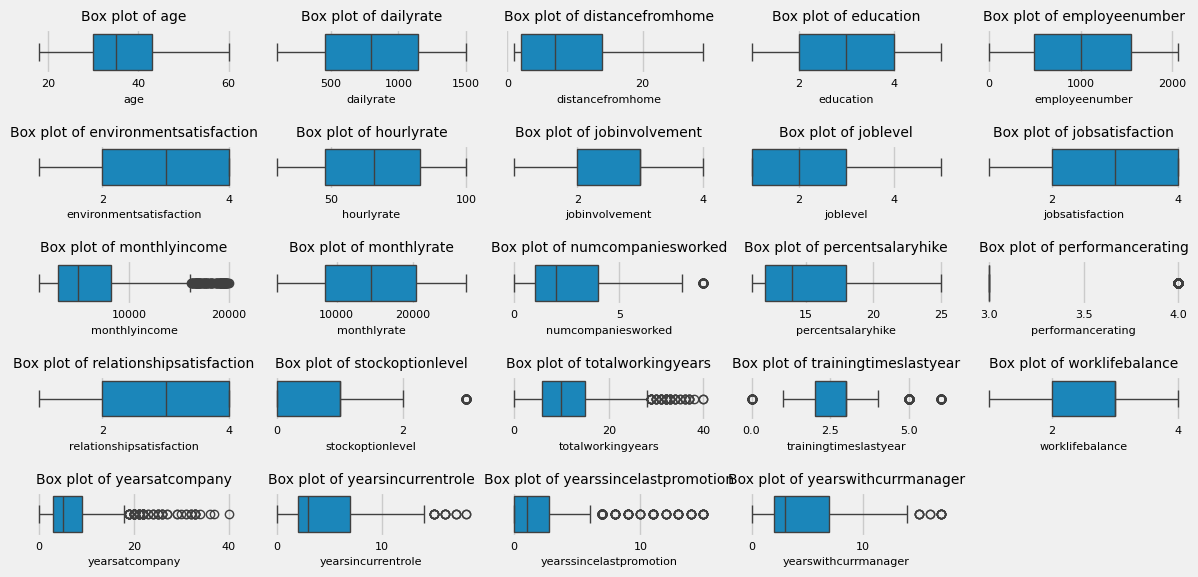

In [15]:
# Check for outliers
# YOUR CODE HERE
plt.figure(figsize=(12, 8))

for i, column in enumerate(num_columns, 1):
    plt.subplot(7, 5, i)
    sns.boxplot(x=df[column])
    plt.xlabel(column, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(f'Box plot of {column}', fontsize=10)
    plt.tight_layout()

plt.show()

### Handling outliers

Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]

In [16]:
# YOUR CODE HERE
Q1 = df[num_columns].quantile(0.25) #Q1 (25th percentile) and Q3 (75th percentile)
Q3 = df[num_columns].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_1 = df[(df[num_columns] >= lower_bound) & (df[num_columns] <= upper_bound)] # Filter the data to remove outliers

print(f"Original data shape: {df.shape}")
print(f"Data shape after removing outliers: {df_1.shape}")

Original data shape: (1170, 32)
Data shape after removing outliers: (1170, 32)


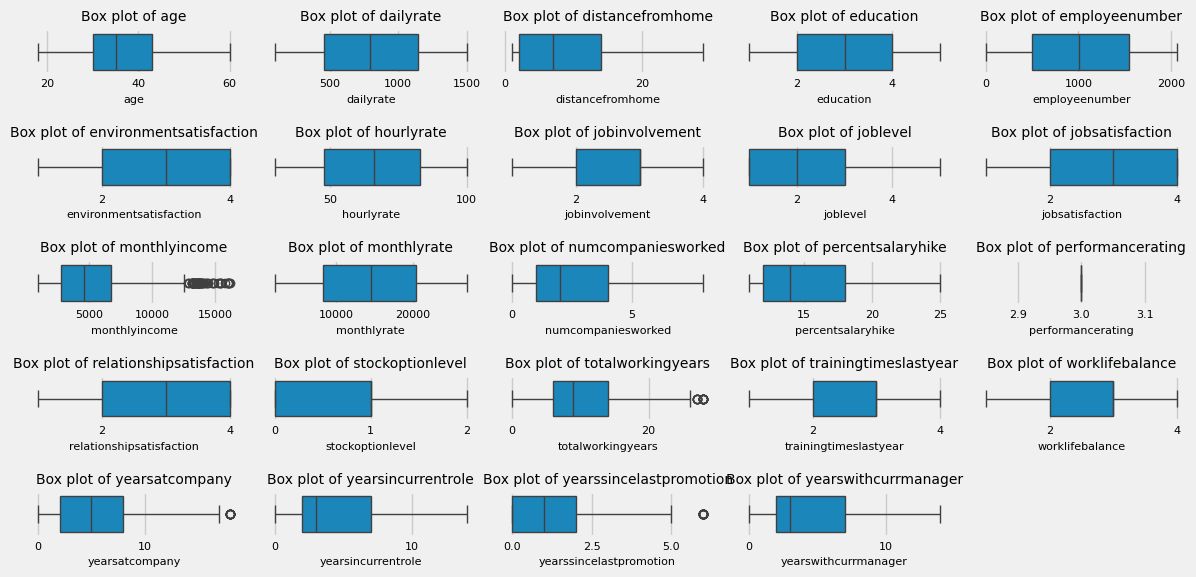

In [17]:
# Recheck for outliers
# YOUR CODE HERE
plt.figure(figsize=(12, 8))

for i, column in enumerate(num_columns, 1):
    plt.subplot(7, 5, i)
    sns.boxplot(x=df_1[column])
    plt.xlabel(column, fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(f'Box plot of {column}', fontsize=10)
    plt.tight_layout()

plt.show()

### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [18]:
# Count of unique values in Attrition column
# YOUR CODE HERE
attrition_counts = df['attrition'].value_counts()
print(attrition_counts)

attrition
No     981
Yes    189
Name: count, dtype: int64


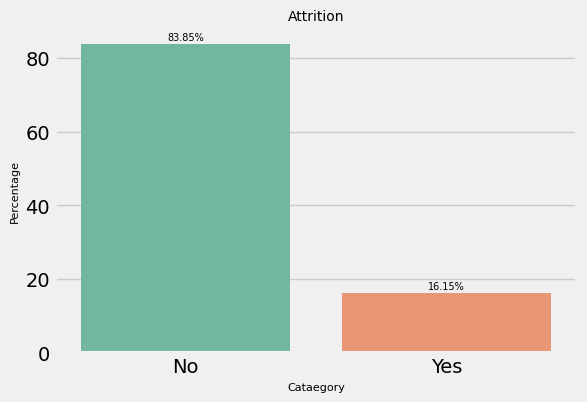

In [19]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE
attrition_p = (attrition_counts / attrition_counts.sum()) * 100
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=attrition_counts.index, y=attrition_p, palette='Set2')
plt.title('Attrition', fontsize=10)
plt.xlabel('Cataegory', fontsize=8)
plt.ylabel('Percentage', fontsize=8)
for i in range(len(attrition_p)):
    ax.text(i, attrition_p.values[i] + 1, f'{attrition_p.values[i]:.2f}%',
            ha='center', fontsize=7)
plt.show()

If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

In [20]:
# Feature Importance
X = df[num_columns]
y = df['attrition']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = model.feature_importances_
important_features = X.columns[feature_importances > 0.05]  # 5% threshold for importance
print(important_features)

Index(['age', 'dailyrate', 'distancefromhome', 'employeenumber', 'hourlyrate',
       'monthlyincome', 'monthlyrate', 'totalworkingyears', 'yearsatcompany'],
      dtype='object')


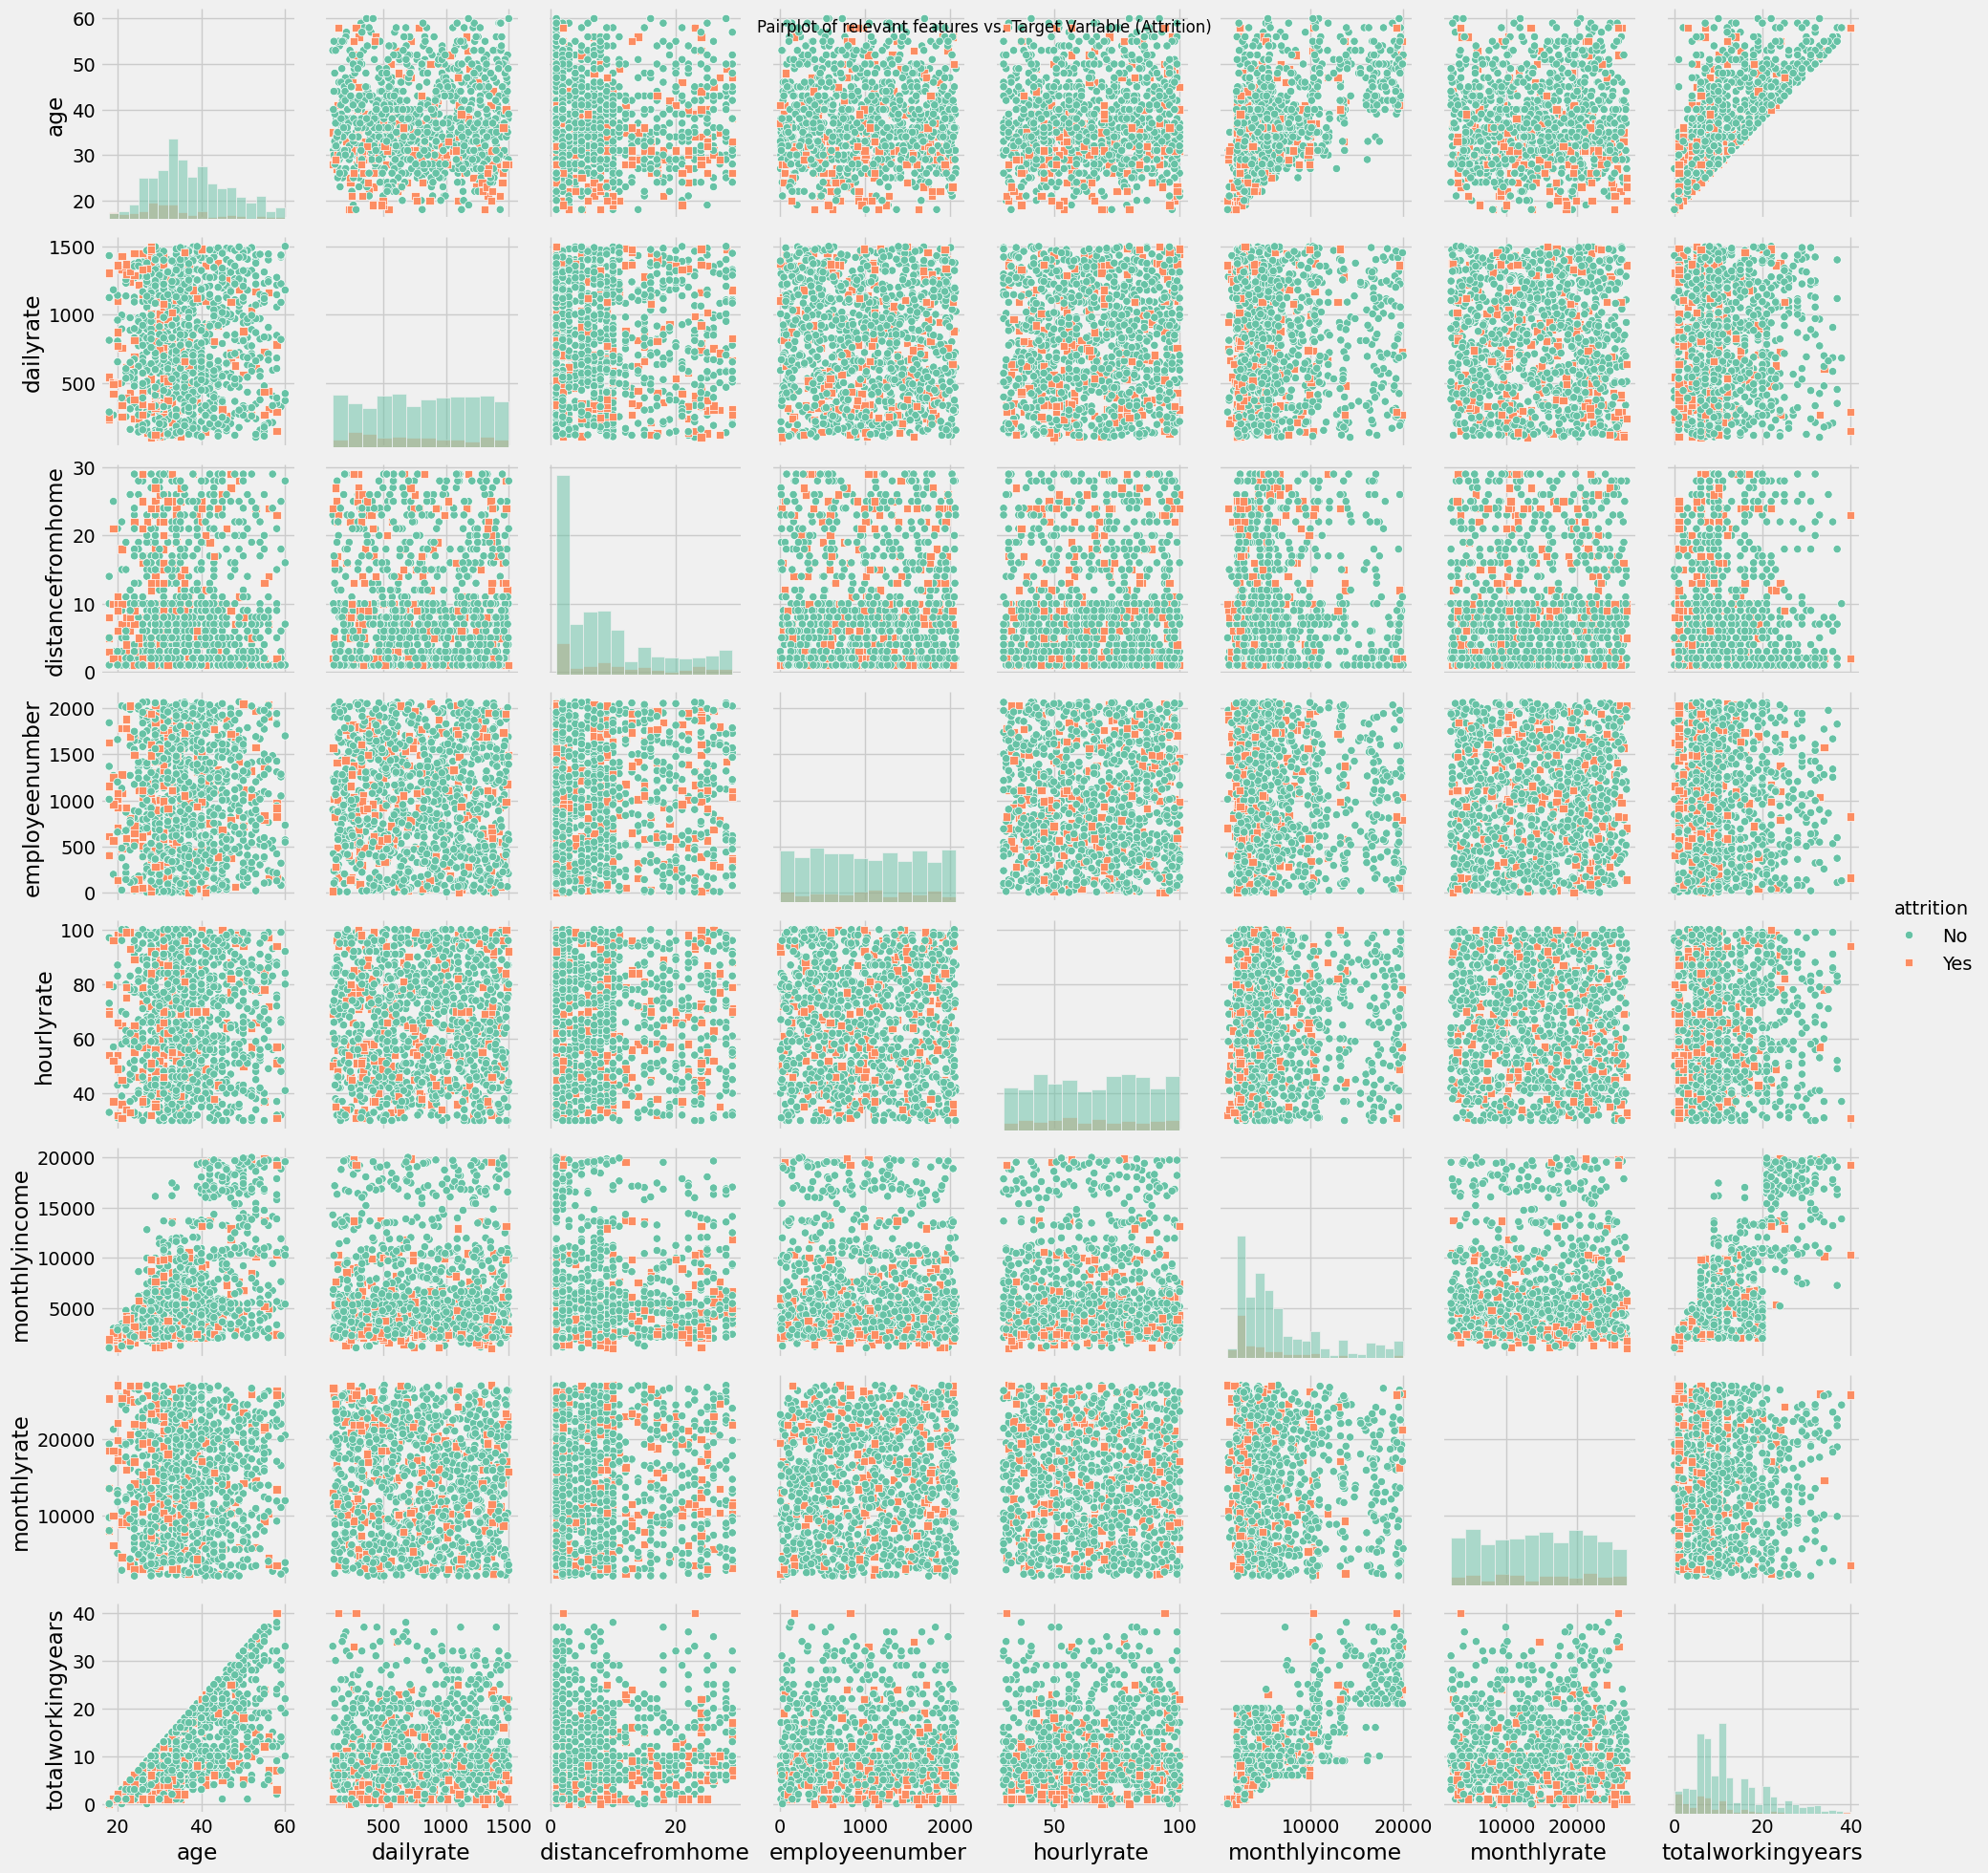

In [24]:
# Visualize a pairplot with relevant features
# YOUR CODE HERE
df_pairplot = df[['attrition','age','dailyrate','distancefromhome','employeenumber','hourlyrate','monthlyincome','monthlyrate','totalworkingyears']]
sns.pairplot(df_pairplot, hue='attrition', palette="Set2", diag_kind='hist', markers=["o", "s"])
plt.suptitle("Pairplot of relevant features vs. Target Variable (Attrition)", size=12)
plt.show()

### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

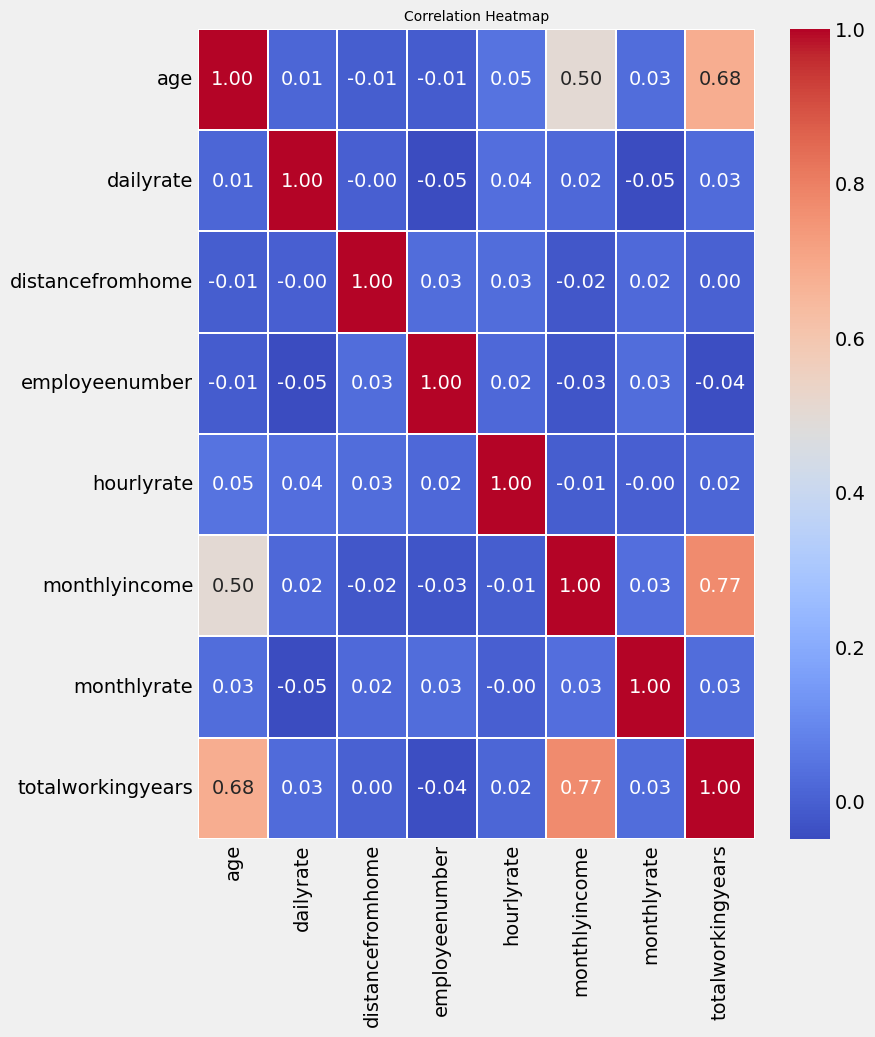

In [25]:
corr_matrix = df_pairplot.drop(columns=['attrition']).corr()
plt.figure(figsize=(8, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths= .3)

plt.title("Correlation Heatmap", fontsize=10)
plt.show()

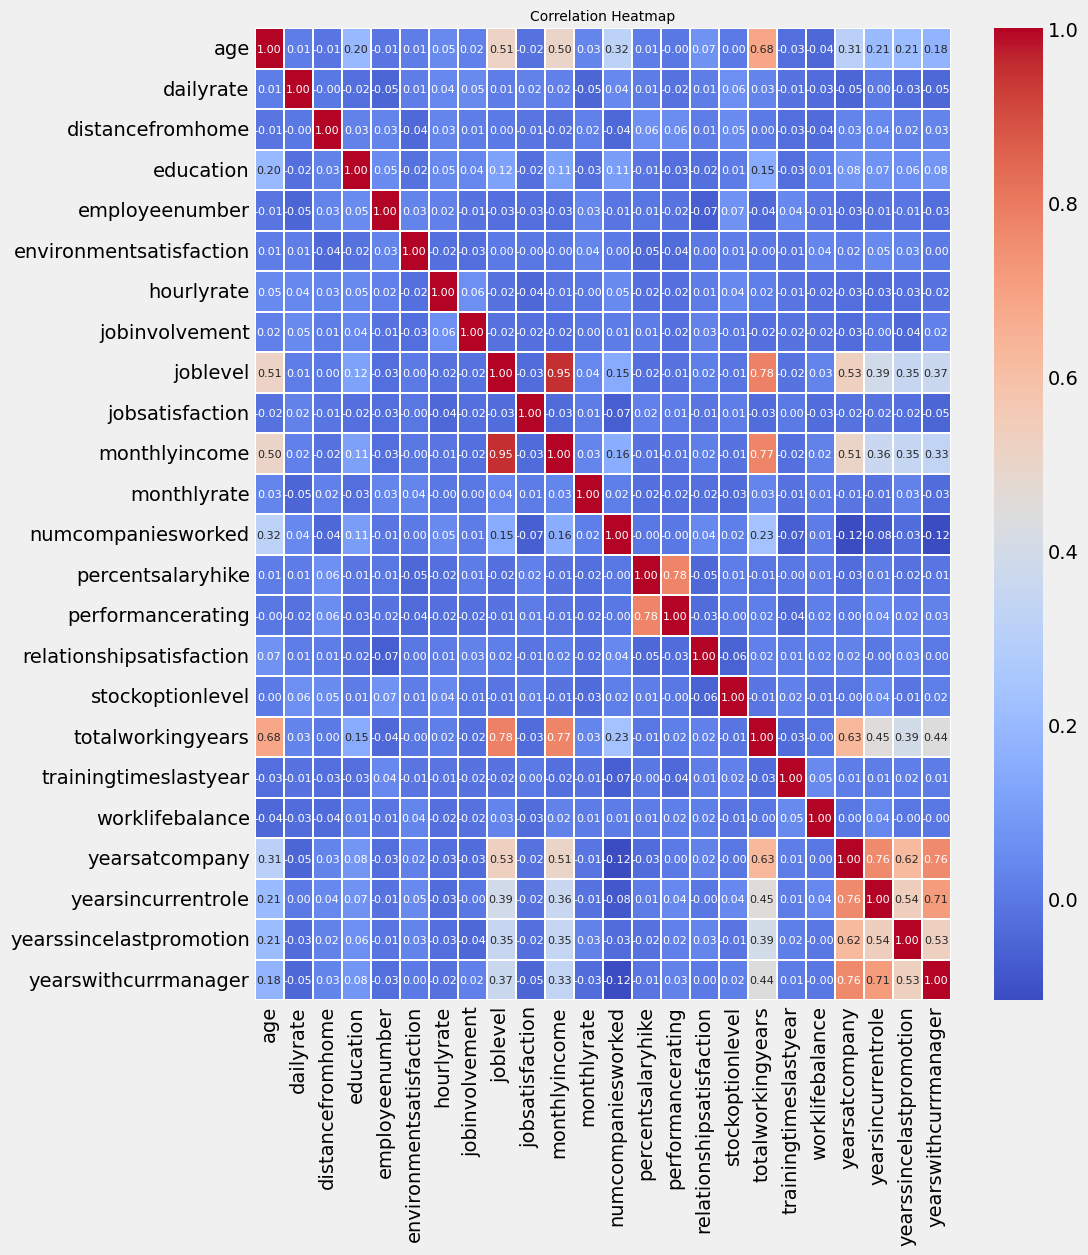

In [26]:
# Visualize heatmap
# YOUR CODE HERE
corr_matrix = df[num_columns].corr()
plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths= .3, annot_kws={'size': 8})

plt.title("Correlation Heatmap", fontsize=10)
plt.show()

Comment on the observations made with the pairplot and heatmap

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [41]:
# YOUR CODE HERE
df_en = df[cat_columns]
encoder = LabelEncoder() # label encoding cataegorical variables
for col in cat_columns:
    df_en[col] = encoder.fit_transform(df_en[col])

print(df_en)

df_combined = pd.concat([df[num_columns], df_en], axis=1) # concat num & encoded cat features
print(df_combined.shape)
df_combined.head()

      businesstravel  department  educationfield  gender  jobrole  \
0                  2           1               1       0        4   
1                  2           1               3       0        0   
2                  2           1               3       1        6   
3                  2           2               1       1        7   
4                  2           1               1       1        2   
...              ...         ...             ...     ...      ...   
1165               0           1               5       1        6   
1166               2           2               3       0        3   
1167               1           1               5       1        6   
1168               0           2               1       1        7   
1169               2           1               3       0        6   

      maritalstatus  overtime  attrition  
0                 1         0          0  
1                 2         0          0  
2                 2         0          1  

age  dailyrate  distancefromhome  education  employeenumber  \
0   45        556                25          2            1888   
1   34        970                 8          2             757   
2   39        360                23          3            1310   
3   26        933                 1          3             476   
4   40        329                 1          4            1361   

   environmentsatisfaction  hourlyrate  jobinvolvement  joblevel  \
0                        2          93               2         2   
1                        2          96               3         2   
2                        3          93               3         1   
3                        3          57               3         2   
4                        2          88               3         1   

   jobsatisfaction  monthlyincome  monthlyrate  numcompaniesworked  \
0                4           5906        23888                   0   
1                3           6142         7360                   3   
2                1           3904        22154                   0   
3                3           5296        20156                   1   
4                2           2387         6762                   3   

   percentsalaryhike  performancerating  relationshipsatisfaction  \
0                 13                  3                         4   
1                 11                  3                         4   
2                 13                  3                         1   
3                 17                  3                         2   
4                 22                  4                         3   

   stockoptionlevel  totalworkingyears  trainingtimeslastyear  \
0                 2                 10                      2   
1                 0                 10                      2   
2                 0                  6                      2   
3                 1                  8                      3   
4                 1                  7                      3   

   worklifebalance  yearsatcompany  yearsincurrentrole  \
0                2               9                   8   
1                3               5                   1   
2                3               5                   2   
3                3               8                   7   
4                3               4                   2   

   yearssincelastpromotion  yearswithcurrmanager  businesstravel  department  \
0                        3                     8               2           1   
1                        4                     3               2           1   
2                        0                     3               2           1   
3                        7                     7               2           2   
4                        0                     3               2           1   

   educationfield  gender  jobrole  maritalstatus  overtime  attrition  
0               1       0        4              1         0          0  
1               3       0        0              2         0          0  
2               3       1        6              2         0          1  
3               1       1        7              1         0          0  
4               1       1        2              1         0          0

In [42]:
# Separate features (X) and target (y)
X = df_combined.drop(columns=['attrition'])  # Features
y = df_combined['attrition']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test data shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training data shape: X_train: (936, 31), y_train: (936,)
Test data shape: X_test: (234, 31), y_test: (234,)


In [44]:
#SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"Resampled training data shape: X_train_res: {X_train_res.shape}, y_train_res: {y_train_res.shape}")

Resampled training data shape: X_train_res: (1568, 31), y_train_res: (1568,)


Optional:
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters.

Refer to the Additional Notebook: CatBoost parameter tuning [CDS-B8 GDrive -> Module 3 -> Assignments -> July 27, 2024 -> Additional Notebook (ungraded) -> Addl_NB_Tuning_hyerparameters_using_Hyperopt]

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance.

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

In [ ]:
# Copy the data
# YOUR CODE HERE

In [ ]:
# Target Column
# YOUR CODE HERE

In [ ]:
# Feature Space
# YOUR CODE HERE

### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [65]:
# Create CatBoost model
# YOUR CODE HERE
cat_features = [
    'businesstravel',
    'department',
    'educationfield',
    'gender',
    'jobrole',
    'maritalstatus',
    'overtime',
    'education',
    'jobinvolvement',
    'joblevel',
    'performancerating',
    'worklifebalance',
    'environmentsatisfaction',
    'relationshipsatisfaction',
    'jobsatisfaction'
]

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    cat_features= cat_features,  # Specify categorical columns
    eval_metric='AUC',  # Evaluation metric
    random_state=42,
    early_stopping_rounds=50, # stop training early if the model performance doesn't improve after 50 rounds
    verbose=100,  # Show progress every 100 iterations
)

In [70]:
# Model training
# YOUR CODE HERE
model.fit(X_train_res, y_train_res)
#model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

0:	total: 28.5ms	remaining: 14.2s
100:	total: 2.8s	remaining: 11.1s
200:	total: 5.41s	remaining: 8.04s
300:	total: 7.38s	remaining: 4.88s
400:	total: 9.28s	remaining: 2.29s
499:	total: 11.2s	remaining: 0us


### Model performance

In [71]:
# Model performance on all sets
# YOUR CODE HERE
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 85.47%
ROC AUC: 0.71
F1 Score: 0.45


## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

In [ ]:
# Copy dataframe
# YOUR CODE HERE

**Hint:** Use pd.get_dummies

In [ ]:
# Handling categorical features
# YOUR CODE HERE

In [ ]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

In [ ]:
# Rename target column
# YOUR CODE HERE

In [ ]:
# Feature Space
# YOUR CODE HERE

# Targer label
# YOUR CODE HERE

### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [78]:
# Create XGBoost classifier model
# YOUR CODE HERE
model = XGBClassifier(
    n_estimators=500,           # Number of boosting trees
    learning_rate=0.05,         # Learning rate
    max_depth=6,                # Maximum depth of the tree
    subsample=0.8,              # Subsample ratio of the training data
    colsample_bytree=0.8,       # Subsample ratio of columns when constructing each tree
    random_state=42,            # For reproducibility
    eval_metric='auc',          # Use AUC for evaluation
    use_label_encoder=False     # Avoid warnings about label encoding
)

In [79]:
# Model training
# YOUR CODE HERE
model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

### Model Performance

In [80]:
# Model performance on all sets
# YOUR CODE HERE
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 85.90%
ROC AUC: 0.72
F1 Score: 0.48


## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

In [ ]:
## Following the same procedure as followed in XGBoost

# Copy the dataframe
# YOUR CODE HERE

# Handling categorical features
# YOUR CODE HERE

# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

# Rename target column
# YOUR CODE HERE

# Features Space
# YOUR CODE HERE

# Target Label
# YOUR CODE HERE

### Model Definition

**Hint:**
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Create LightGBM classifier model
# YOUR CODE HERE

In [ ]:
# Model training
# YOUR CODE HERE

### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE

## Results

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

In [ ]:
# Create a dataframe for computed metrics for different models
# YOUR CODE HERE

Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

## Kaggle Prediction

Load data from Kaggle competition site

In [ ]:
# From the given Kaggle competition link, load the dataset 'hr_employee_attrition_test.csv'
# YOUR CODE HERE

In [ ]:
# From the dataset 'hr_employee_attrition_test.csv', drop columns ['id','employeenumber', 'employeecount', 'over18'] having single value
# YOUR CODE HERE

In [ ]:
# Handle categorical features
# YOUR CODE HERE

In [ ]:
# Concat the dummy variables to actual dataframe and remove initial categorical columns
# YOUR CODE HERE

Predictions

In [ ]:
# Get the predictions using your already trained CatBoost classifier model achieved in Exercise 9
# YOUR CODE HERE

In [ ]:
# Get the predictions using your already trained XGBoost classifier model achieved in Exercise 11
# YOUR CODE HERE

Get the predictions using your trained Microsoft LightGBM model (Optional)

In [ ]:
# Get the predictions using your already trained Microsoft LightGBM classifier model
# achieved under the optional exercise 'Apply LightGBM (Optional)'
# YOUR CODE HERE

Save predictions to csv and submit under given Kaggle competiton link

In [ ]:
# YOUR CODE HERE